In [183]:
pip install pandas

In [184]:
import pandas as pd

In [185]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [438]:
df_iris = pd.read_excel('C:\Data\Data.xls')
df_iris
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [439]:
'''Бачимо, що серед мінімальних значень, є від'ємні та 0. Очевидно, що вони є некорекними, отже, замінимо їх на NA. Кількість записів 2415, хоча їх 2424 насправді. Було відкинуто пусті значення''' 

"Бачимо, що серед мінімальних значень, є від'ємні та 0. Очевидно, що вони є некорекними, отже, замінимо їх на NA. Кількість записів 2415, хоча їх 2424 насправді. Було відкинуто пусті значення"

In [440]:
numeric_columns = df_iris.select_dtypes(include=[np.number]).columns
df_iris[numeric_columns] = df_iris[numeric_columns].map(lambda x: np.nan if x <= 0 else x)

In [441]:
df_iris_1 = df_iris.iloc[:1000]
df_iris_1_filled = df_iris_1.fillna(df_iris_1.mean(numeric_only = True))

df_iris_2 = df_iris.iloc[1000:2000]
df_iris_2_filled = df_iris_2.ffill()

df_iris_3 = df_iris.iloc[2000:]
df_iris_3_filled = df_iris_3.bfill()

df_iris_filled = pd.concat([df_iris_1_filled, df_iris_2_filled, df_iris_3_filled], axis=0)

In [442]:
df_iris_filled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2423.000000,2423.000000,2423.000000,2423.000000
mean,6.795817,4.071403,4.731750,2.242225
std,1.035443,0.787648,1.846564,0.986030
min,4.300000,2.000000,1.000000,0.100000
25%,6.060000,3.520000,2.940000,1.520000
50%,6.710000,4.020000,5.100000,2.250000
75%,7.510000,4.590000,6.160000,2.950000
max,10.490000,7.470000,9.040000,5.440000


In [443]:
df_iris_filled

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [444]:
na_columns = df_iris_filled.isna().any()

print("Columns containing NaN values:")
print(na_columns)

na_count = df_iris_filled.isna().sum()

print("Count of NaN values in each column:")
print(na_count)

Columns containing NaN values:
sepal_length     True
sepal_width      True
petal_length     True
petal_width      True
species         False
dtype: bool
Count of NaN values in each column:
sepal_length    1
sepal_width     1
petal_length    1
petal_width     1
species         0
dtype: int64


In [445]:
'''Бачимо, що в останньому рядку заміщення не відбулося, мабуть, це із-за специфіки метода bfill(), тому використаємо метод ffill() для дозаповнення'''

'Бачимо, що в останньому рядку заміщення не відбулося, мабуть, це із-за специфіки метода bfill(), тому використаємо метод ffill() для дозаповнення'

In [446]:
df_iris_3_filled = df_iris_3.bfill().ffill()

df_iris_filled = pd.concat([df_iris_1_filled, df_iris_2_filled, df_iris_3_filled], axis=0)

In [447]:
df_iris_filled

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
1,7.38,4.04,5.15,2.37,Iris-versicolor
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
...,...,...,...,...,...
2419,6.11,5.08,3.15,2.22,Iris-setosa
2420,7.17,6.07,4.30,1.78,Iris-setosa
2421,6.48,4.98,4.12,3.03,Iris-setosa
2422,6.73,4.71,3.67,2.90,Iris-setosa


In [448]:
df_iris_filled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2424.00000,2424.000000,2424.000000,2424.000000
mean,6.79579,4.071666,4.731312,2.242496
std,1.03523,0.787592,1.846309,0.985917
min,4.30000,2.000000,1.000000,0.100000
25%,6.06000,3.520000,2.940000,1.520000
50%,6.71500,4.025000,5.100000,2.250000
75%,7.51000,4.590000,6.160000,2.950000
max,10.49000,7.470000,9.040000,5.440000


In [449]:
'''Тепер бачимо, що кількість записів коректна. Зросло середнє значення, що очевидно після заміни'''

'Тепер бачимо, що кількість записів коректна. Зросло середнє значення, що очевидно після заміни'

In [450]:
df_iris_2sp = df_iris_filled[(df_iris_filled.species == 'Iris-setosa') | (df_iris_filled.species == 'Iris-virginica')]
df_iris_2sp.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.40,2.70,5.30,1.90,Iris-virginica
2,5.00,3.40,1.60,0.40,Iris-setosa
3,6.12,3.19,5.90,2.01,Iris-virginica
4,6.78,3.47,6.13,2.29,Iris-virginica
5,5.38,3.47,1.67,0.86,Iris-setosa


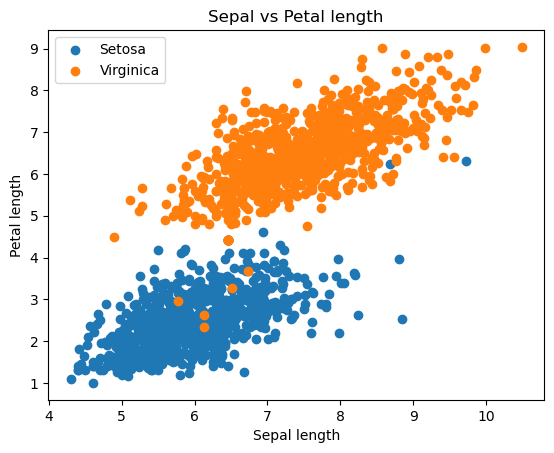

In [451]:
import matplotlib.pyplot as plt

x1 = df_iris_2sp[df_iris_2sp['species']=='Iris-setosa']['sepal_length']
y1 = df_iris_2sp[df_iris_2sp['species']=='Iris-setosa']['petal_length']

x2 = df_iris_2sp[df_iris_2sp['species']=='Iris-virginica']['sepal_length']
y2 = df_iris_2sp[df_iris_2sp['species']=='Iris-virginica']['petal_length']

plt.scatter(x1, y1, label = 'Setosa')
plt.scatter(x2, y2, label = 'Virginica')
plt.title('Sepal vs Petal length')
plt.ylabel('Petal length')
plt.xlabel('Sepal length')
plt.legend()

In [452]:
'''Побудувала один графік, щоб подивитися, чи є підозрілі дані. (По ідеї треба всі можливі будувати і аналізувати, так?) Із графіку бачимо, що є декілька ймовірно некоректних значень для Setosa (а саме 2), і також 5 ймовірно некоректних значень для Virginica. Цілком можливо, що було помилково внесено дані, які належать Setosa - Verginica, і навпаки - дані Verginica - Setosa, або іншому різновиду. Можна було поміняти значення виду у відповідних записах місцями, але так як видів у нас 3 (Verginica, Setosa, Versicolor) та є ще записи по невизначеному виду - whatever, тому було б логічно просто видалити ці записи. Але поки не знаю, на скільки доцільно це робити. Чи могли б ви дати тут пораду, будь ласка''' 

'Побудувала один графік, щоб подивитися, чи є підозрілі дані. (По ідеї треба всі можливі будувати і аналізувати, так?) Із графіку бачимо, що є декілька ймовірно некоректних значень для Setosa (а саме 2), і також 5 ймовірно некоректних значень для Virginica. Цілком можливо, що було помилково внесено дані, які належать Setosa - Verginica, і навпаки - дані Verginica - Setosa, або іншому різновиду. Можна було поміняти значення виду у відповідних записах місцями, але так як видів у нас 3 (Verginica, Setosa, Versicolor) та є ще записи по невизначеному виду - whatever, тому було б логічно просто видалити ці записи. Але поки не знаю, на скільки доцільно це робити. Чи могли б ви дати тут пораду, будь ласка'

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

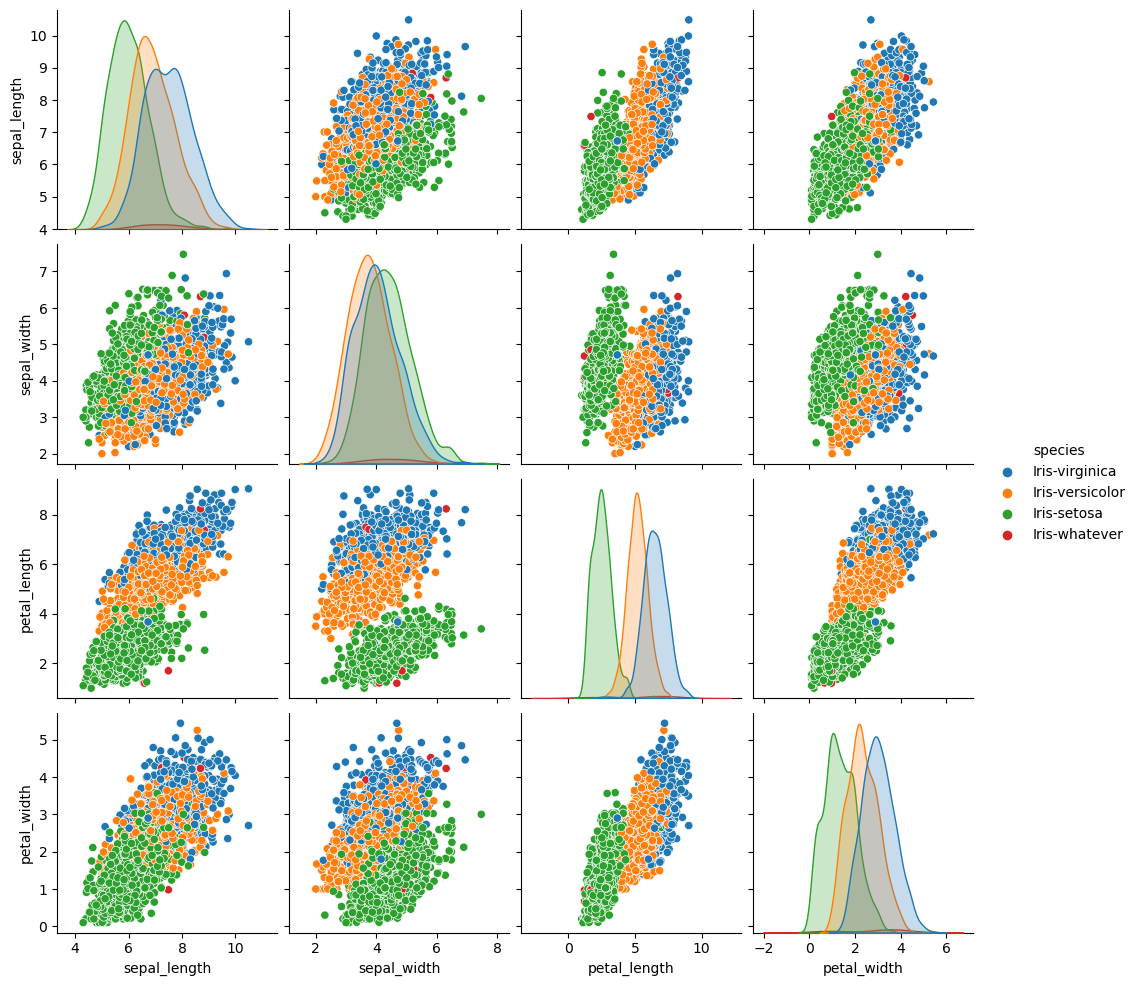

In [453]:
import seaborn as sns
sns.pairplot(df_iris_filled, hue='species')

In [454]:
X = df_iris_filled[df_iris_filled.species=='Iris-setosa'].drop(labels=['species', 'petal_width'], axis = 1)
Y = df_iris_filled[df_iris_filled.species=='Iris-setosa']['petal_width']

In [455]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [456]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [457]:
lr.predict(X_test)
pred = lr.predict(X_test)

In [458]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('MAE:', round(mean_absolute_error(Y_test, pred), 2))
print('MSE:', round(mean_squared_error(Y_test, pred), 2))
print('RMSE:', round(np.sqrt(mean_squared_error(Y_test, pred)), 2))

MAE: 0.41
MSE: 0.27
RMSE: 0.52


In [459]:
'''Відхилення досить невеликі, тому можемо вважати, що модель хороша'''

'Відхилення досить невеликі, тому можемо вважати, що модель хороша'

In [460]:
'''Додаткове завдання'''

'Додаткове завдання'

In [461]:
df_iris = pd.read_excel('C:\Data\Data2.xls')
df_iris
df_iris_set2.describe()

,sepal_length,petal_length,petal_width,,,.
count,2298.000000,2318.000000,2320.000000,0.0,0.0,0.0
mean,6.829926,4.774435,2.284759,NaN,NaN,NaN
std,1.681099,2.301999,1.737262,NaN,NaN,NaN
min,4.300000,1.000000,0.100000,NaN,NaN,NaN
25%,6.050000,2.920000,1.510000,NaN,NaN,NaN
50%,6.750000,5.140000,2.270000,NaN,NaN,NaN
75%,7.530000,6.180000,2.960000,NaN,NaN,NaN
max,70.000000,70.000000,70.000000,NaN,NaN,NaN


In [463]:
'''У цьому дата фреймі є від'ємні значення, 0, NA, N/A, NULL, random, Random. Всі ці значення перетворимо у NA, а потім будемо заповнювати методами згідно з умов дз. Ще у нас є 3 зайві стовпчики справа. Видалимо їх'''

"У цьому дата фреймі є від'ємні значення, 0, NA, N/A, NULL, random, Random. Всі ці значення перетворимо у NA, а потім будемо заповнювати методами згідно з умов дз. Ще у нас є 3 зайві стовпчики справа. Видалимо їх"

'''У цьому дата фреймі є від'ємні значення, 0, NA, N/A,  NULL, random, Random. Всі ці значення перетворимо у NA, а потім будемо заповнювати методами згідно з умов дз. Ще у нас є 3 зайві стовпчики справа. Видалимо їх''' 

In [464]:
numeric_columns = df_iris.select_dtypes(include=[np.number]).columns
df_iris[numeric_columns] = df_iris[numeric_columns].map(lambda x: np.nan if x <= 0 else x)

In [465]:
df_iris = df_iris.replace(['N/A','null','NULL','NA','random', 'Random'], np.nan)
df_iris = df_iris.iloc[:, :-3]

In [466]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2298.000000,2391.000000,2392.000000,2320.000000
mean,6.829926,3.978156,4.626731,2.284759
std,1.681099,1.716950,2.412232,1.737262
min,4.300000,0.000000,0.000000,0.100000
25%,6.050000,3.445000,2.740000,1.510000
50%,6.750000,4.000000,5.090000,2.270000
75%,7.530000,4.580000,6.150000,2.960000
max,70.000000,70.000000,70.000000,70.000000


In [467]:
df_iris_1 = df_iris.iloc[:1000]
df_iris_1_filled = df_iris_1.fillna(df_iris_1.mean(numeric_only = True))

df_iris_2 = df_iris.iloc[1000:2000]
df_iris_2_filled = df_iris_2.ffill()

df_iris_3 = df_iris.iloc[2000:]
df_iris_3_filled = df_iris_3.bfill()

df_iris_filled = pd.concat([df_iris_1_filled, df_iris_2_filled, df_iris_3_filled], axis=0)

In [468]:
df_iris_filled

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.93,3.66,4.94,2.69,Iris-versicolor
1,6.89,3.79,6.16,2.81,Iris-virginica
2,6.70,3.64,5.99,2.81,Iris-virginica
3,6.74,2.68,4.71,2.29,Iris-versicolor
4,5.96,4.16,2.99,1.56,Iris-setosa
...,...,...,...,...,...
2419,6.96,3.76,2.73,0.65,Iris-setosa
2420,7.43,4.14,6.11,3.00,Iris-virginica
2421,6.54,4.56,1.69,0.87,Iris-setosa
2422,7.11,4.66,5.30,3.80,Iris-virginica


In [469]:
df_iris_filled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2424.000000,2424.000000,2424.000000,2424.000000
mean,6.863292,3.980459,4.630486,2.313399
std,2.088119,1.707066,2.404074,2.191558
min,4.300000,0.000000,0.000000,0.100000
25%,6.070000,3.450000,2.750000,1.520000
50%,6.780000,4.000000,5.080000,2.266430
75%,7.530000,4.580000,6.150000,2.960000
max,70.000000,70.000000,70.000000,70.000000


In [470]:
na_columns = df_iris_filled.isna().any()

print(na_columns)

na_count = df_iris_filled.isna().sum()
print(na_count)

rows_with_na = df_iris_filled[df_iris_filled.isna().any(axis=1)]
print(rows_with_na)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


In [471]:
X = df_iris_filled[df_iris_filled.species=='Iris-setosa'].drop(labels=['species', 'petal_width'], axis = 1)
Y = df_iris_filled[df_iris_filled.species=='Iris-setosa']['petal_width']

In [472]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [473]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [474]:
lr.predict(X_test)
pred = lr.predict(X_test)

In [475]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print('MAE:', round(mean_absolute_error(Y_test, pred), 2))
print('MSE:', round(mean_squared_error(Y_test, pred), 2))
print('RMSE:', round(np.sqrt(mean_squared_error(Y_test, pred)), 2))

MAE: 0.57
MSE: 3.67
RMSE: 1.92


In [476]:
'''Похибки суттєві, особливо MSE і RMSE. Отже, модель, не дуже хороша. Цікаво, як побудувати краще'''

'Похибки суттєві, особливо MSE і RMSE. Отже, модель, не дуже хороша. Цікаво, як побудувати краще'